# Project: Final Report
Study by: Saurabh, Augustine, Gelesh, 
Indiana University

### Changes to Phase 1 after review with Professor

1. <a href='#context'>Adding data source, hyperlink, more context</a>
2. <a href='#evaluation'>Additonal Metrics: precision, recall, FNR, f1, f0.5</a>
3. <a href='#roc'>ROC Curve: ROC, AUC</a>
4. <a href='#smpl_vary'>Impact of different sampling ratios</a>
5. <a href='#feature_imp'>Variable importance:decision tree approach(not complete)</a>
6. <a href='#feature_eng'>Feature Engineering(Investigating)</a>

### Changes to Phase 2 report

1. <a href='#feature_imp'>Variable importance:decision tree approach</a>
2. <a href='#feature_sel'>Feature Selection</a>
3. <a href='#pipeline_full'>Full Pipeline</a>
4. <a href='#feature_eng'>Feature Engineering</a>
5. <a href='#stats'>Statistical Significance</a>

### Changes to Phase 3 report
2. <a href='#feature_eng1'>New Features(Feature Engineering)</a>
3. <a href='#stats1'>Final Statistical Test</a>

<a id='context'></a>
# Credit Card Fraud Detection

The dataset used for this Machine Learning project is obained from Kaggle. A detailed description about the data set could be found at https://www.kaggle.com/agpickersgill/credit-card-fraud-detection/data . 


The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the dataset does not provide the original features or the background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA.  The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, which can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

# Setup
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline.


In [482]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
from IPython.display import Image
import os

import warnings
warnings.simplefilter('ignore')


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Explore Data
The data has been downloaded from the following website. 
https://www.kaggle.com/agpickersgill/credit-card-fraud-detection/data 

The data is stored as creditcard.csv file, to a local folder where this notebook file is stored.

In [483]:
# Read data into a panda dataframe

trainFile = pd.read_csv("creditcard.csv")
trainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are 30 columns and 284807 rows where column class is the target variable. It is a binary value, which can have either 0 (not fraud) or 1 (fraud) value. Column "Amount" is the amount of the transaction and "Time" is the time of the transaction. The rest of the features V1 to V28 are not described. There are no missing values in the data
set.

In [484]:
trainFile.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As shown above, the dataset has only one categorical variable "Class", which is the target variable. Features V1, V2, ... V28 are numerical values corresponding to the principal components obtained with PCA. Hence there is no scope for categorical pipeline in this case. Numerical pipelines are implemented as part of the ML pipelines, in later sections. 

## Let us split fradulent and non-fraudlent transactions

Size of Fraud data: (492, 31)
Size of non-fraud data:  (284315, 31)


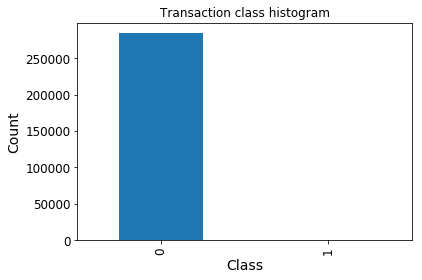

In [485]:
non_fraud = trainFile.loc[(trainFile["Class"] ==0)]
fraud = trainFile.loc[(trainFile["Class"] ==1)]
print ("Size of Fraud data:", fraud.shape)
print ("Size of non-fraud data: ", non_fraud.shape)
class_count = trainFile["Class"].value_counts()
class_count.plot(kind = 'bar')
plt.title("Transaction class histogram")
plt.xlabel("Class")
plt.ylabel("Count")

The data is highly unbalanced with respect of Class variable values i.e. Fraud transaction and Non-Fraud transactions. There are only 0.17% of the rows with value Class = 1.

## Strategy

** There could be multiple approach for this classification problem taking into consideration the highly unbalanced data. **

  1. OVER-SAMPLING: In this approach under-represented class are copied multiple times to match with the count of over
     represented data (Class 0 in this case)
               
  2. UNDER-SAMPLING: In this approach instances of over-represented class are deleted.
  
  3. Ratio Match: In this approach each classes are split in 50-50 ratio from the dataset

## Approach

1. We will use resampling by strategy 3 above i.e. Ratio matching and test this approach using a simple logistic regression classifier.

2. After fitting the model, several performance metrics would be tested and analysed.

3. We will repeat the best resampling, by tuning the parameters in the logistic regression classifier.

4. We will finally perform classifications model using other classification algorithms.

## Correlation matrix Visualization

In [486]:
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

### Correlations for all the data

In [487]:
trainFile["Class"].astype('float')
trainFile_corr = trainFile.corr()


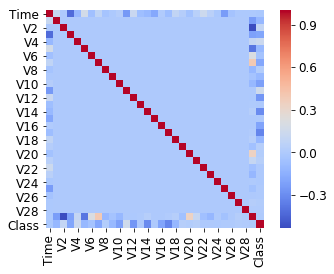

In [488]:
sns.heatmap(trainFile_corr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.show()

** From the correlation matrix it can be observed that most of the data features are not correlated.This is because,most of the features (V1-V28) are the result of Principal Component Analysis (PCA) algorithm.** 

In [489]:
abs(trainFile_corr["Class"]).sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faae430afd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7faae29a95c0>]], dtype=object)

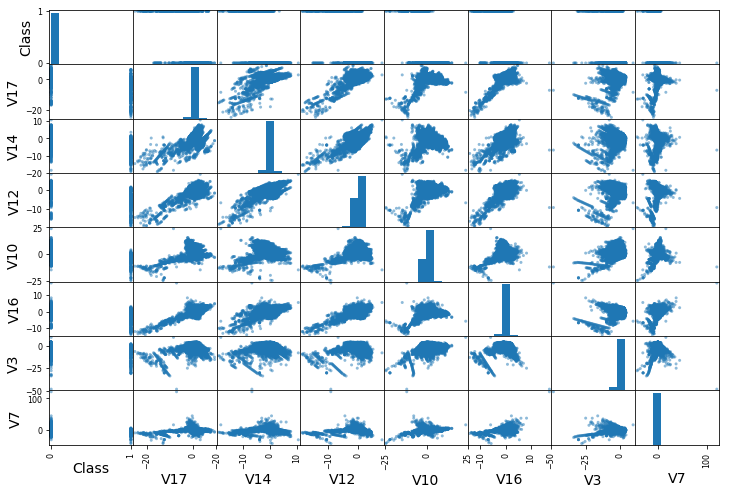

In [490]:
from pandas.tools.plotting import scatter_matrix

# Top three correlated inputs with housing_median_age
attributes = ["Class", "V17", "V14","V12","V10","V16","V3","V7"]

scatter_matrix(trainFile[attributes], figsize=(12, 8))

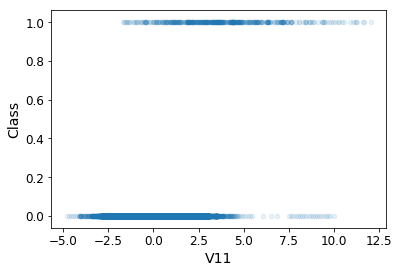

In [491]:
trainFile.plot(kind="scatter", x="V11", y="Class",
             alpha=0.1)

### Correlations for non fraud class.

As shown above the correlation of PCA values in general is of little significance. So here we did a correlation of data separately for both the classes. 


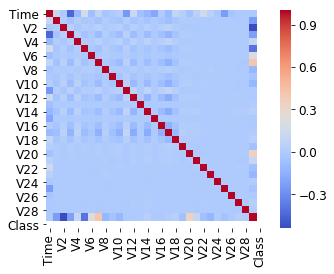

In [492]:
non_fraud_corr =  non_fraud.corr()
sns.heatmap(non_fraud_corr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.show()

### Correlations for fraud class.

The fraud transactions show significant correlations between several features which is contrast to the non-fraud class. 

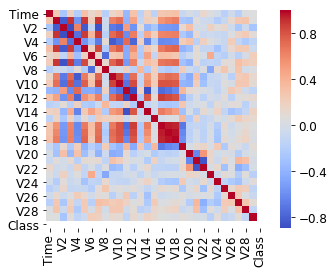

In [493]:
fraud_corr =  fraud.corr()
sns.heatmap(fraud_corr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.show()

In [494]:
# Print Correlations above threshold of 0.15 for non fraud class
rows, cols = non_fraud.shape
flds = list(non_fraud.columns)

corr = non_fraud_corr.values

for i in range(cols):
    for j in range(i+1, cols):
        if abs(corr[i,j]) > 0.15:
            print (flds[i], ' ', flds[j], ' ', corr[i,j])

Time   V3   -0.441000843828
Time   V5   0.17296305662
Time   V11   -0.248900242788
Time   V15   -0.183583440014
Time   V25   -0.2332903996
V1   Amount   -0.231250459093
V2   Amount   -0.536545862136
V3   Amount   -0.219129992654
V5   Amount   -0.39278246301
V6   Amount   0.216433304863
V7   Amount   0.416628393144
V12   V17   -0.168631828058
V14   V17   -0.164956515395
V20   Amount   0.340429013078


In [495]:
# Print Correlations above threshold of 0.8 for fraud class
rows, cols = fraud.shape
flds = list(fraud.columns)

corr = fraud_corr.values

for i in range(cols):
    for j in range(i+1, cols):
        if abs(corr[i,j]) > 0.8:
            print (flds[i], ' ', flds[j], ' ', corr[i,j])

V1   V2   -0.819225799919
V1   V3   0.907875010214
V1   V5   0.894968330318
V1   V7   0.897608781905
V2   V3   -0.876903687461
V2   V5   -0.828390632195
V2   V7   -0.862983083711
V3   V5   0.883689375906
V3   V7   0.882312423759
V3   V10   0.818243199173
V4   V9   -0.818853177377
V5   V7   0.839737773573
V7   V10   0.85982293397
V9   V10   0.863965960937
V10   V12   0.834330692289
V10   V16   0.806637049048
V10   V17   0.803109223826
V11   V12   -0.889719603937
V11   V14   -0.862044272186
V12   V16   0.881703464637
V12   V17   0.842796212537
V16   V17   0.96015329643
V16   V18   0.944497680813
V17   V18   0.971492155927
V21   V22   -0.852111505179


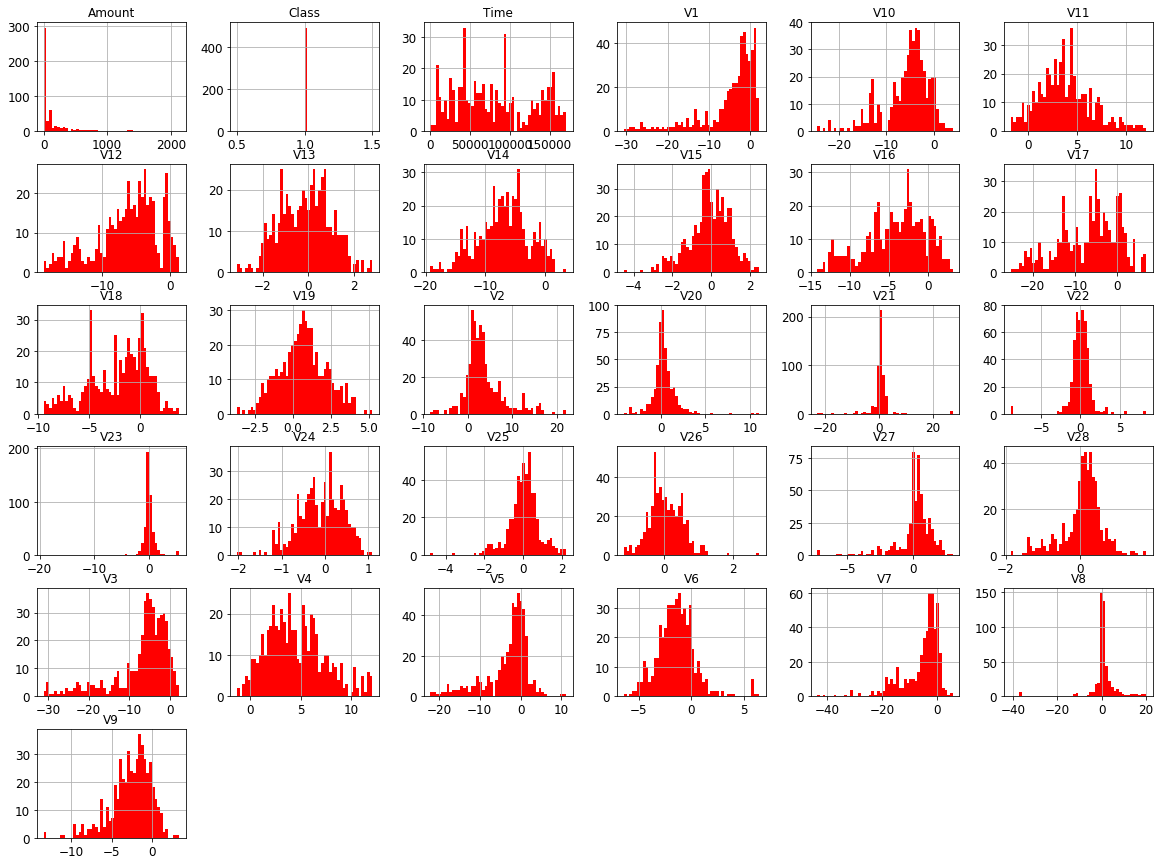

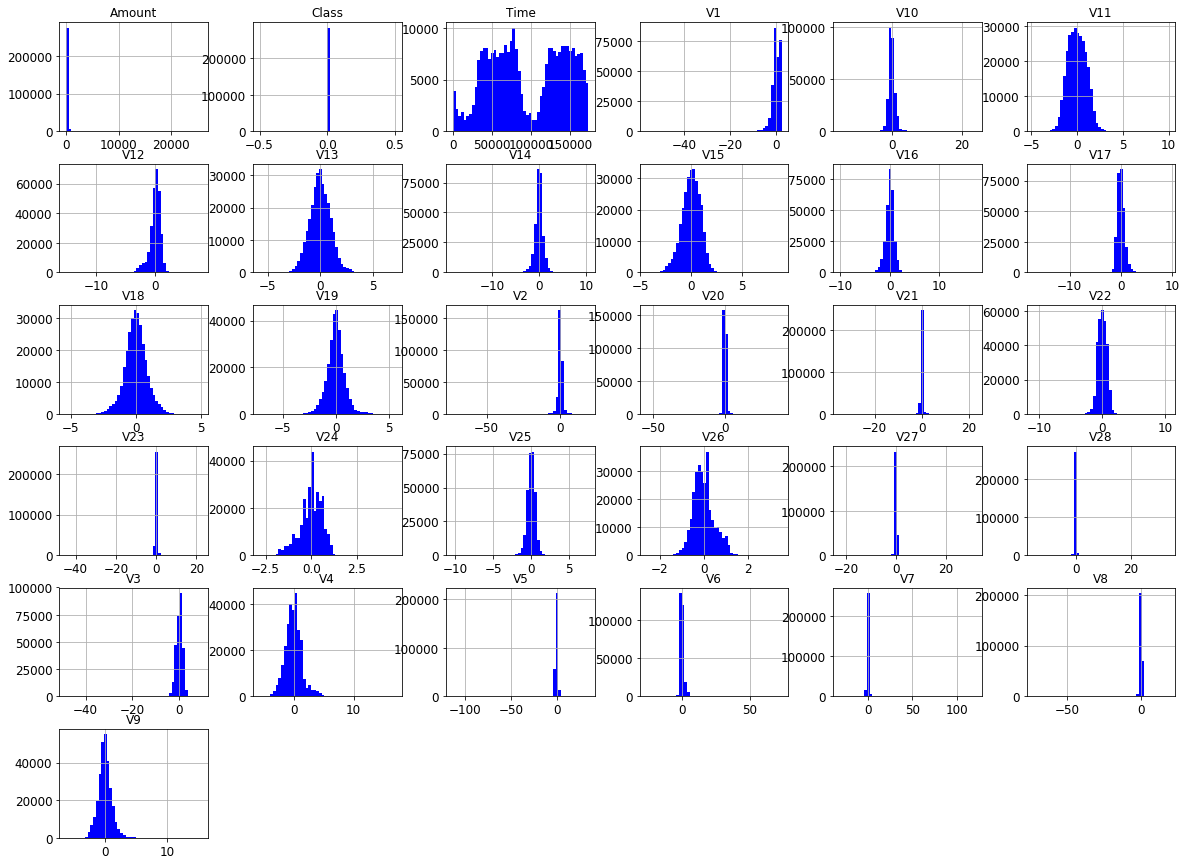

In [496]:
%matplotlib inline
import matplotlib.pyplot as plt

fraud.hist( color='red', label='Fraud', bins=50, figsize=(20,15))
non_fraud.hist( color='blue', label='Non Fraud', bins=50, figsize=(20,15))

plt.show()

# Resampling imbalanced dataset with equal ratio of binary classes

** Here we transform the dataset to have the minority class count match the majority class count.**

In [497]:
# random_state=42

fraud_count = len(fraud)
# fraud_count
smpl_non_fraud = non_fraud.sample(n=fraud_count, random_state=42)
# len(smpl_non_fraud)
train_data=smpl_non_fraud.append(fraud, ignore_index=True)

train_data = shuffle(train_data)
train_data.reset_index(drop=True)

len(train_data)

984

In [498]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 613 to 102
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null fl

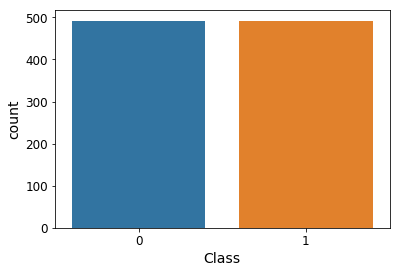

In [499]:
%matplotlib inline
sns.countplot(x='Class', data=train_data)

# Preprocessing pipeline

In [500]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [501]:
# Select features to use for modeling.

cc_num_attribs = list(train_data)[1:-1] # To select all features except Time

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(cc_num_attribs)),
        ('std_scaler', StandardScaler()),
    ])


# Create a held out dataset 

Creating a held out dataset using the train_test_split(70 / 30)

In [502]:
X = train_data.loc[:,train_data.columns != 'Class']
y = train_data.loc[:,train_data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [503]:
cc_prepared = num_pipeline.fit_transform(X_train)
cc_prepared

array([[-0.89806124,  0.28158614, -0.8070744 , ...,  1.03299976,
         0.17946369,  0.16398761],
       [-2.67479634,  2.40615497, -2.69238318, ...,  1.56241666,
         1.10080148,  0.01872225],
       [ 0.2507766 ,  0.18991737,  0.11367063, ..., -0.21876044,
         0.38577623, -0.45504795],
       ..., 
       [-0.56891605,  0.89535243, -0.61964276, ..., -0.19491977,
        -1.15607268, -0.45829197],
       [ 0.34178032, -0.06846432,  0.41652939, ...,  0.21105828,
         0.4311184 , -0.24876637],
       [ 0.67338688, -0.73496334,  0.76525722, ..., -0.06542503,
        -0.01141753, -0.3152211 ]])

# Base model with logistic regression

In [504]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(cc_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [505]:
# let's try the full pipeline on the testing data set

test_prepared = num_pipeline.fit_transform(X_test)
y_pred = log_reg.predict(test_prepared)


<a id='evaluation'></a>
## Evaluation

We plan to evaluate the ML model by analyzing the true positive (TP), true negative (TN), false positive (FP) and false negative (FN) predictions using the following metrics.

1.	Precision : This shows the ability of the ML model to predict positive cases(fraud). This is expressed as TP / (TP+FP)	
2.	Recall : This measures the sensitivity of the model to predict positive cases(fraud), This is expressed as TP / (TP+FN). This is an important metric for this ML problem and our objective is to maximize this metric.   	
3.	False Negative Rate : This is shows the amount of fraud cases missed by the ML model. This is expressed as FN / (TP+FN). This is also an important metric for this ML problem and our objective is to minimize this metric.
4.	F1 Score : This is the harmonic mean of precision and recall. This is expressed as 2*TP / (2*TP+FP+FN)	
5.	F0.5 Score : This is the F-beta score, where beta is 0.5. The expression to calculate the F-beta is shown below.

$$( 1+beta^2 ) \frac{(precision * recall)}{ (beta^2 * precision + recall)}$$

6.	AUC : The AUC represents a model’s ability to discriminate between fraud and non-fraud classes. An area of 1.0 represents a model that made all predictions perfectly. 

Our objective is to detect maximum number of fraud transactions(true positives). Hence we intend to maximize the recall and minimize the False Negative Rate. 


In [506]:
# Let us calculate the False negative rate (FNR), Miss rate
def fnr(y_test, y_pred):
# from sklearn.metrics import confusion_matrix

    log_cm = confusion_matrix(y_test, y_pred)
    #tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    tn, fp, fn, tp = log_cm.ravel()
    # (tn, fp, fn, tp)
    if isinstance(y_test, pd.DataFrame):
        true_pos = len(y_test.loc[(y_test["Class"] ==1)])
    if isinstance(y_test, np.ndarray):
        true_pos = np.count_nonzero(y_test == 1)
    
    #tp/true_pos # recall home_grown
    #tp/(tp+fp) # precision home_grown
    fnr = fn / true_pos
    return fnr

In [507]:
metrics = [precision_score, 
           recall_score,
           fnr,
           f1_score,
           lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=0.5),
           roc_auc_score]
metrics_names = ["Precision", 
                 "Recall", 
                 "False Negative",
                 "F1",
                 "F0.5",
                 "AUC"]

In [508]:
samples = [(test_prepared, y_test)]
models_names = ["Logistic, Ratio(1F:1NF)"]

In [509]:
def evaluate(models, metrics, samples, metrics_names, models_names):
    results = np.zeros((len(samples) * len(models), len(metrics)))
    samples_names = []
#     for m in models_names:
#         samples_names.extend([m + " Train", m + " Test"])
    for m_num, model in enumerate(models):
        for row, sample in enumerate(samples):
            for col, metric in enumerate(metrics):
                results[row + m_num * 2, col] = metric(sample[1], model.predict(sample[0]))
    results = pd.DataFrame(results, columns=metrics_names, index=models_names)
    return results

In [510]:
models = [log_reg]

In [511]:
update_res_fe = 1
update_res_vot = 1
res = evaluate(models, metrics, samples, metrics_names, models_names)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.9375,0.895522,0.104478,0.916031,0.928793,0.92307


In [512]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, y_pred)
log_acc

0.92567567567567566

In [513]:
from sklearn.metrics import recall_score

log_recall = recall_score(y_test, y_pred)
log_recall

0.89552238805970152

In [514]:
from sklearn.metrics import precision_score
log_pre = precision_score(y_test, y_pred)
log_pre

0.9375

In [515]:
from sklearn.metrics import roc_auc_score
log_roc = roc_auc_score(y_test, y_pred)
log_roc

0.92306983600515935

In [516]:
# Let us calculate the False negative rate (FNR), Miss rate
# def fnr(y_test, y_pred):
# from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, y_pred)
#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
tn, fp, fn, tp = log_cm.ravel()
# (tn, fp, fn, tp)
true_pos = len(y_test.loc[(y_test["Class"] ==1)])
#tp/true_pos # recall home_grown
#tp/(tp+fp) # precision home_grown
fnr = fn / true_pos
fnr

0.1044776119402985

In [517]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

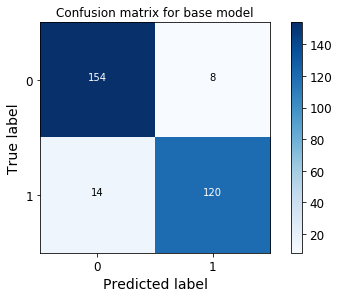

In [518]:
# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(log_cm
                      , classes=class_names
                      , title='Confusion matrix for base model')
plt.show()

<a id='roc'></a>
## ROC Curve



In [519]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [520]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

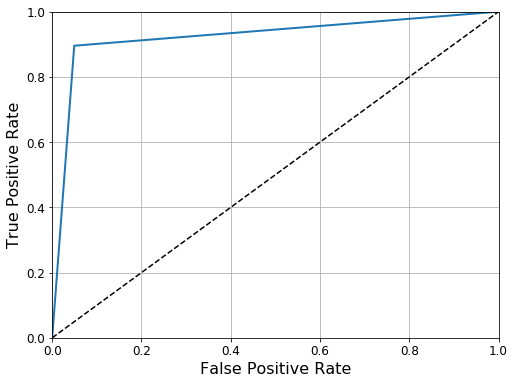

In [521]:

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.grid()
plt.show()

<a id='smpl_vary'></a>
# Impact of different sampling ratios
Here we study the impact of the different sampling ratios on the model performance.

## Sampling ratio of 1Fraud : 10 Non-fraud


In [522]:

fraud_count = len(fraud)
# fraud_count
smpl_non_fraud = non_fraud.sample(n=fraud_count*10, random_state=42)
# len(smpl_non_fraud)
train_data=smpl_non_fraud.append(fraud, ignore_index=True)

train_data = shuffle(train_data)
train_data.reset_index(drop=True)

len(train_data)

5412

In [523]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5412 entries, 5009 to 2048
Data columns (total 31 columns):
Time      5412 non-null float64
V1        5412 non-null float64
V2        5412 non-null float64
V3        5412 non-null float64
V4        5412 non-null float64
V5        5412 non-null float64
V6        5412 non-null float64
V7        5412 non-null float64
V8        5412 non-null float64
V9        5412 non-null float64
V10       5412 non-null float64
V11       5412 non-null float64
V12       5412 non-null float64
V13       5412 non-null float64
V14       5412 non-null float64
V15       5412 non-null float64
V16       5412 non-null float64
V17       5412 non-null float64
V18       5412 non-null float64
V19       5412 non-null float64
V20       5412 non-null float64
V21       5412 non-null float64
V22       5412 non-null float64
V23       5412 non-null float64
V24       5412 non-null float64
V25       5412 non-null float64
V26       5412 non-null float64
V27       5412 non-null fl

In [524]:
X = train_data.loc[:,train_data.columns != 'Class']
y = train_data.loc[:,train_data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [525]:
cc_prepared = num_pipeline.fit_transform(X_train)
test_prepared = num_pipeline.fit_transform(X_test)


In [526]:
log_reg.fit(cc_prepared, y_train)
y_pred = log_reg.predict(test_prepared)

In [527]:
log_pre = precision_score(y_test, y_pred)
log_pre

0.96899224806201545

In [528]:
samples = [(test_prepared, y_test)]
models_names = ["Logistic, Ratio(1F:10NF)"]

In [529]:
models = [log_reg]

In [530]:
res_10 = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_10)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.92307
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.91531


## Sampling ratio of 1Fraud : 20 Non-fraud


In [531]:

fraud_count = len(fraud)
# fraud_count
smpl_non_fraud = non_fraud.sample(n=fraud_count*20, random_state=42)
# len(smpl_non_fraud)
train_data=smpl_non_fraud.append(fraud, ignore_index=True)

train_data = shuffle(train_data)
train_data.reset_index(drop=True)

len(train_data)

10332

In [532]:
X = train_data.loc[:,train_data.columns != 'Class']
y = train_data.loc[:,train_data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [533]:
cc_prepared = num_pipeline.fit_transform(X_train)
test_prepared = num_pipeline.fit_transform(X_test)


In [534]:
log_reg.fit(cc_prepared, y_train)
y_pred = log_reg.predict(test_prepared)

In [535]:
log_pre = precision_score(y_test, y_pred)
log_pre

0.95652173913043481

In [536]:
samples = [(test_prepared, y_test)]
models_names = ["Logistic, Ratio(1F:20NF)"]

In [537]:
res_20 = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_20)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553


** So far the best results are obtained 
when using equal number of fraud and non fraud classes. So we proceed with equal sampling of data.**

# Train a Random Forest Classifier

In [538]:
from  sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(cc_prepared, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [539]:
samples = [(test_prepared, y_test)]
models_names = ["RandomForest, Ratio(1F:1NF)"]
models = [rf_clf]
res_rf = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_rf)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309


# Objective evaluation via K-fold crossfold validation

## K-fold crossfold validation for Random Forest Classifier

In [540]:
from sklearn.model_selection import cross_val_score


score_randomforest = cross_val_score(rf_clf,test_prepared,y_test['Class'],scoring='recall',cv=10)
score_randomforest


array([ 0.9375    ,  0.875     ,  0.875     ,  0.75      ,  0.93333333,
        0.8       ,  0.93333333,  0.86666667,  0.86666667,  0.8       ])

In [541]:
validation_scores = pd.DataFrame(columns=['Model Name','mean','SD'])

validation_scores.loc[0] = ['RF',score_randomforest.mean(),score_randomforest.std()]

validation_scores

,Model Name,mean,SD
0,RF,0.86375,0.060382


## K-fold crossfold validation for Logistic Classifier

In [542]:
score_LR = cross_val_score(log_reg,test_prepared,y_test['Class'],scoring='recall',cv=10)
score_LR
validation_scores.loc[1] = ['LC',score_LR.mean(),score_LR.std()]

In [543]:
validation_scores

,Model Name,mean,SD
0,RF,0.86375,0.060382
1,LC,0.84375,0.052844


<a id='stats'></a>
# Statistical Significance

In [544]:
def stat_test(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

In [545]:
from sklearn.model_selection import cross_val_score
from scipy import stats
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# A sampling based bakeoff using *K-fold cross-validation*: 
# it randomly splits the training set into K distinct subsets (k=30)
# this bakeoff framework can be used for regression or classification
#Control system is a linear regression based pipeline

kFolds=10

y_test_ctrl = y_test
# Logistic Regression as base
control = cross_val_score(log_reg, test_prepared, y_test_ctrl['Class'],
                             scoring='recall', cv=kFolds)

# control_acc = control.mean()
# # control = control.mean()
# display_scores(control)

# display_scores(lin_rmse_scores)
#Treatment system is a random forest based pipeline

treatment = cross_val_score(rf_clf, test_prepared, y_test['Class'],
                         scoring='recall', cv=kFolds)

treatment_acc = treatment.mean()

pval = stat_test(control, treatment)

pval

There is no significant difference between the two machine learning pipelines (Accept H0)


0.43355504390459287


# Finetune model/pipeline hyperparameters


Let’s assume at this point that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that:

* GridSearch
* RandomSearch

## Finetune via GridSearch

In [546]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [5, 10, 20, 29]},
    # then try 8 (2×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [5, 10, 20,29]},
  ]

# train across 5 folds, that's a total of (12+8)*5=100 rounds of training 
grid_search = GridSearchCV(rf_clf, param_grid, cv=5,
                           scoring='recall')
grid_search.fit(cc_prepared, y_train['Class'])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [5, 10, 20, 29]}, {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [5, 10, 20, 29]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

The best hyperparameter combination found:

In [547]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 29, 'n_estimators': 10}

In [548]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=29, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [549]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.819333107368 {'max_features': 5, 'n_estimators': 3}
0.822392806432 {'max_features': 5, 'n_estimators': 10}
0.834248161522 {'max_features': 5, 'n_estimators': 30}
0.8342858865 {'max_features': 10, 'n_estimators': 3}
0.837230346834 {'max_features': 10, 'n_estimators': 10}
0.837230346834 {'max_features': 10, 'n_estimators': 30}
0.837230346834 {'max_features': 20, 'n_estimators': 3}
0.837230346834 {'max_features': 20, 'n_estimators': 10}
0.834287950296 {'max_features': 20, 'n_estimators': 30}
0.83719055806 {'max_features': 29, 'n_estimators': 3}
0.840172743373 {'max_features': 29, 'n_estimators': 10}
0.837188494264 {'max_features': 29, 'n_estimators': 30}
0.831305764984 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.834287950296 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.840132954598 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.837230346834 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
0.849041785558 {'bootstrap': False, 

In [550]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.083175,0.002151,0.819333,0.957841,NaN,5,3,"{'max_features': 5, 'n_estimators': 3}",20,0.882353,...,0.838235,0.959259,0.805970,0.974170,0.761194,0.940959,0.012575,0.000105,0.039991,0.012046
1,0.267629,0.003842,0.822393,0.959319,NaN,5,10,"{'max_features': 5, 'n_estimators': 10}",19,0.838235,...,0.867647,0.966667,0.791045,0.963100,0.820896,0.955720,0.005343,0.000045,0.028581,0.010474
2,0.794521,0.008255,0.834248,0.988175,NaN,5,30,"{'max_features': 5, 'n_estimators': 30}",17,0.867647,...,0.867647,0.996296,0.835821,0.981550,0.805970,0.981550,0.024408,0.000292,0.030477,0.006762
3,0.149164,0.002163,0.834286,0.956392,NaN,10,3,"{'max_features': 10, 'n_estimators': 3}",16,0.838235,...,0.867647,0.970370,0.820896,0.922509,0.835821,0.948339,0.017999,0.000099,0.019795,0.020229
4,0.489706,0.003546,0.837230,0.961531,NaN,10,10,"{'max_features': 10, 'n_estimators': 10}",7,0.867647,...,0.867647,0.959259,0.835821,0.970480,0.820896,0.963100,0.021208,0.000065,0.028210,0.007657
5,1.513471,0.008099,0.837230,0.991868,NaN,10,30,"{'max_features': 10, 'n_estimators': 30}",7,0.867647,...,0.867647,1.000000,0.835821,0.992620,0.820896,0.985240,0.052712,0.000379,0.028210,0.005914
6,0.286523,0.002101,0.837230,0.950433,NaN,20,3,"{'max_features': 20, 'n_estimators': 3}",7,0.852941,...,0.867647,0.955556,0.835821,0.955720,0.820896,0.959410,0.019784,0.000045,0.021205,0.009299
7,0.965756,0.003573,0.837230,0.960057,NaN,20,10,"{'max_features': 20, 'n_estimators': 10}",7,0.867647,...,0.867647,0.955556,0.835821,0.948339,0.820896,0.974170,0.044943,0.000034,0.028210,0.010300
8,2.864783,0.007765,0.834288,0.988905,NaN,20,30,"{'max_features': 20, 'n_estimators': 30}",15,0.852941,...,0.867647,0.992593,0.835821,0.992620,0.820896,0.985240,0.228082,0.000150,0.025523,0.003307
9,0.394433,0.002072,0.837191,0.957078,NaN,29,3,"{'max_features': 29, 'n_estimators': 3}",12,0.867647,...,0.867647,0.948148,0.835821,0.974170,0.805970,0.970480,0.037979,0.000034,0.026969,0.014967


<a id='feature_imp'></a>

## Input variable importance

In [551]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.00943818,  0.00077591,  0.00378516,  0.00505085,  0.00288121,
        0.00251394,  0.01444878,  0.00498985,  0.00316053,  0.04464456,
        0.00499303,  0.0033821 ,  0.00735646,  0.73836247,  0.0077385 ,
        0.00588725,  0.06233499,  0.00285879,  0.01004729,  0.00873911,
        0.00477564,  0.00216577,  0.00921629,  0.00281544,  0.01299811,
        0.01227775,  0.0038654 ,  0.00260088,  0.00589574])

In [552]:
attributes = list(X_train.columns.values)
attributes

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [553]:
sortedFeatures = sorted(zip(feature_importances,attributes), reverse=False)
sortedFeatures

[(0.00077590838787866285, 'V1'),
 (0.0021657677838395626, 'V21'),
 (0.0025139431767268673, 'V5'),
 (0.0026008847063430148, 'V27'),
 (0.0028154390074454335, 'V23'),
 (0.0028587913491173842, 'V17'),
 (0.0028812064803227675, 'V4'),
 (0.0031605334999590868, 'V8'),
 (0.0033821019410861159, 'V11'),
 (0.0037851561003721577, 'V2'),
 (0.0038653983412739409, 'V26'),
 (0.0047756421494834864, 'V20'),
 (0.0049898480358458123, 'V7'),
 (0.0049930332304023188, 'V10'),
 (0.0050508510743818942, 'V3'),
 (0.0058872543398852872, 'V15'),
 (0.0058957421947489572, 'V28'),
 (0.0073564559943255763, 'V12'),
 (0.0077384959215035052, 'V14'),
 (0.0087391093714691368, 'V19'),
 (0.0092162940008271872, 'V22'),
 (0.0094381839208748826, 'Time'),
 (0.010047290565920325, 'V18'),
 (0.012277748325630607, 'V25'),
 (0.012998114022078084, 'V24'),
 (0.014448782122884668, 'V6'),
 (0.044644564979888869, 'V9'),
 (0.06233498904702732, 'V16'),
 (0.73836246992845711, 'V13')]

In [554]:
np.array(sortedFeatures)[:, 0]

array(['0.000775908387879', '0.00216576778384', '0.00251394317673',
       '0.00260088470634', '0.00281543900745', '0.00285879134912',
       '0.00288120648032', '0.00316053349996', '0.00338210194109',
       '0.00378515610037', '0.00386539834127', '0.00477564214948',
       '0.00498984803585', '0.0049930332304', '0.00505085107438',
       '0.00588725433989', '0.00589574219475', '0.00735645599433',
       '0.0077384959215', '0.00873910937147', '0.00921629400083',
       '0.00943818392087', '0.0100472905659', '0.0122777483256',
       '0.0129981140221', '0.0144487821229', '0.0446445649799',
       '0.062334989047', '0.738362469928'],
      dtype='<U32')

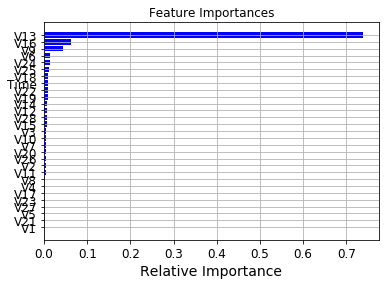

In [555]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure() 
plt.title("Feature importances")
sortedNames = np.array(sortedFeatures)[:, 1]
sortedImportances = np.array(sortedFeatures)[:, 0]

plt.title('Feature Importances')
plt.barh(range(len(sortedNames)), sortedImportances, color='b', align='center')
plt.yticks(range(len(sortedNames)), sortedNames)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

<a id='feature_sel'></a>
## Feature Selection

In [556]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class BestFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [557]:
k=5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices 

array([ 6,  9, 13, 16, 24])

In [558]:
np.array(attributes)[top_k_feature_indices]

array(['V6', 'V9', 'V13', 'V16', 'V24'],
      dtype='<U6')

Let's double check that these are indeed the top k features:

In [559]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.73836246992845711, 'V13'),
 (0.06233498904702732, 'V16'),
 (0.044644564979888869, 'V9'),
 (0.014448782122884668, 'V6'),
 (0.012998114022078084, 'V24')]

** Let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection: **

In [560]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('feature_selection', BestFeatureSelector(feature_importances, k))
])

In [561]:
trainFile_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X_train)

In [562]:
y_pred = preparation_and_feature_selection_pipeline.fit_transform(X_test)

## Comparison of different models

LR: 0.809810 (0.064713)
LR_L1: 0.809810 (0.064713)
LDA: 0.750160 (0.053163)
CART: 0.830172 (0.073830)
RF_10: 0.825066 (0.057487)
RF_100: 0.830900 (0.062243)


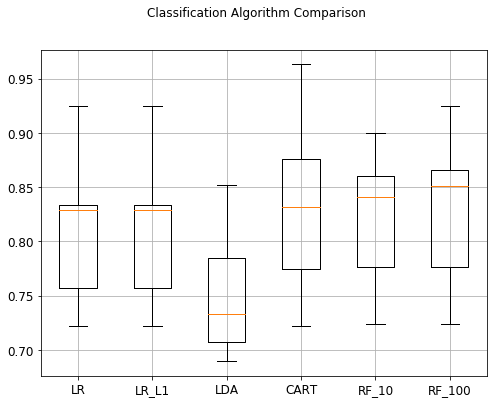

In [563]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from time import time
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

X=trainFile_prepared_top_k_features
Y=y_train



models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LR_L1', LogisticRegression(C=1,penalty='l1',max_iter=1000) ))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RF_10',RandomForestClassifier(n_estimators=10)))
models.append(('RF_100',RandomForestClassifier(n_estimators=100)))
#models.append(('RF_5.21',RandomForestClassifier(max_features=5,n_estimators=21)))

#models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5,n_jobs=-1)))

#models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring ='recall'#'roc_auc' #'recall' #'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(8, 6))
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

<a id='pipeline_full'></a>
## Full pipeline for data prep, feature selection and modeling

In [564]:

k=20
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('feature_selection', BestFeatureSelector(feature_importances, k)),
    ('rf', RandomForestClassifier(bootstrap= False, n_estimators = 10, max_features=k))
   
])

In [565]:
prepare_select_and_predict_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preparation', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [566]:
prepare_select_and_predict_pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [567]:
#Saving results obtained in previous runs permanently.

Prev_res_fe = [('RandomForest, Feautres=5, Ratio(1F:1NF)', 0.849673, 0.844156, 0.155844, 0.846906, 0.848564, 0.918174),
         ('RandomForest, Feautres=10, Ratio(1F:1NF)', 0.848101, 0.870130, 0.129870, 0.858974, 0.852417, 0.930992)]
res_labels = ['index', 'Precision', 'Recall', 'False Negative', 'F1', 'F0.5', 'AUC']
res_fe_df = pd.DataFrame.from_records(Prev_res_fe, columns=res_labels)
res_fe_df.set_index(['index'], inplace=True)

In [568]:
if update_res_fe == 1:
    res = res.append(res_fe_df)
    update_res_fe = 0
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309
"RandomForest, Feautres=5, Ratio(1F:1NF)",0.849673,0.844156,0.155844,0.846906,0.848564,0.918174
"RandomForest, Feautres=10, Ratio(1F:1NF)",0.848101,0.870130,0.129870,0.858974,0.852417,0.930992


In [569]:

samples = [(X_test, y_test)]
models_names = ["RandomForest, Feautres=20, Ratio(1F:1NF)"]


In [570]:
models = [prepare_select_and_predict_pipeline]

In [571]:
res_fe = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_fe)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309
"RandomForest, Feautres=5, Ratio(1F:1NF)",0.849673,0.844156,0.155844,0.846906,0.848564,0.918174
"RandomForest, Feautres=10, Ratio(1F:1NF)",0.848101,0.870130,0.129870,0.858974,0.852417,0.930992
"RandomForest, Feautres=20, Ratio(1F:1NF)",0.829268,0.883117,0.116883,0.855346,0.839506,0.936806


In [572]:
# res.drop(res.tail(1).index,inplace=True)
# res

## Kitchen Sink with VotingClassifier

In [573]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

vot_clf = VotingClassifier(
    estimators=[
                ('rf', RandomForestClassifier(bootstrap= False, n_estimators = 10, max_features=20)),
#                 ('svc', SVC()),
                ('lr', LogisticRegression()),
                ('CART', DecisionTreeClassifier()),
#                 ('LDA', LinearDiscriminantAnalysis())
                ], 
    voting='hard')


In [574]:
k=20
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('feature_selection', BestFeatureSelector(feature_importances, k)),
    ('vot_clf', vot_clf)
   
])

In [575]:
prepare_select_and_predict_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preparation', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'...       splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None))])

In [576]:
prepare_select_and_predict_pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [577]:
#Saving results obtained in previous runs permanently.

Prev_res_vot = [('Voting(LR,RF,SVC,DT,LDA), Feautres=20(1F:1NF)', 0.992424, 0.850649, 0.149351, 0.916084, 0.960411, 0.925155),
         ('Voting(LR,RF,SVC,LDA), Feautres=20(1F:1NF)', 0.992308, 0.837662, 0.162338, 0.908451, 0.956973, 0.918661)]
res_labels = ['index', 'Precision', 'Recall', 'False Negative', 'F1', 'F0.5', 'AUC']
res_vot_df = pd.DataFrame.from_records(Prev_res_vot, columns=res_labels)
res_vot_df.set_index(['index'], inplace=True)

In [578]:
if update_res_vot == 1:
    res = res.append(res_vot_df)
    update_res_vot = 0
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309
"RandomForest, Feautres=5, Ratio(1F:1NF)",0.849673,0.844156,0.155844,0.846906,0.848564,0.918174
"RandomForest, Feautres=10, Ratio(1F:1NF)",0.848101,0.870130,0.129870,0.858974,0.852417,0.930992
"RandomForest, Feautres=20, Ratio(1F:1NF)",0.829268,0.883117,0.116883,0.855346,0.839506,0.936806
"Voting(LR,RF,SVC,DT,LDA), Feautres=20(1F:1NF)",0.992424,0.850649,0.149351,0.916084,0.960411,0.925155
"Voting(LR,RF,SVC,LDA), Feautres=20(1F:1NF)",0.992308,0.837662,0.162338,0.908451,0.956973,0.918661


In [579]:

samples = [(X_test, y_test)]
models_names = ["Voting(LR,RF,DT), Feautres=20(1F:1NF)"]


In [580]:
models = [prepare_select_and_predict_pipeline]

In [581]:
res_vot = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_vot)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309
"RandomForest, Feautres=5, Ratio(1F:1NF)",0.849673,0.844156,0.155844,0.846906,0.848564,0.918174
"RandomForest, Feautres=10, Ratio(1F:1NF)",0.848101,0.870130,0.129870,0.858974,0.852417,0.930992
"RandomForest, Feautres=20, Ratio(1F:1NF)",0.829268,0.883117,0.116883,0.855346,0.839506,0.936806
"Voting(LR,RF,SVC,DT,LDA), Feautres=20(1F:1NF)",0.992424,0.850649,0.149351,0.916084,0.960411,0.925155
"Voting(LR,RF,SVC,LDA), Feautres=20(1F:1NF)",0.992308,0.837662,0.162338,0.908451,0.956973,0.918661
"Voting(LR,RF,DT), Feautres=20(1F:1NF)",0.877419,0.883117,0.116883,0.880259,0.878553,0.938334


## Conclusions derived after Kitchen-sink analysis
Our objective is to maximize the recall score and minimize the False Negative Rate. From the results table, it is clear that the simple model based on logistic regression is performing better. This is confirmed through statistical significance test. Models based on SVC, LDA, Random Forest, Decision Tree etc are not performing better even after several steps of feature selections. The kitchen sink model based on a VotingClassifier (Several ensembles of models based on LR, SVC, LDA, Random Forest and Decision Tree) might have improved the accuracy but did not improve the recall score. Here we used the kitchen sink analysis for demonstration purposes only. Hence we propose a feature engineering method where we generate new features after clustering analysis.

<a id='feature_eng'></a>
# Feature Engineering (Experimental)

The original dataset contains 28 principal components identified as V1, V2, V3...,V28. The data is completely anonymized and hence domain specific feature engineering cannot be performed for this dataset. From pair plot analysis we could find that the feature "Time" is not significant in predicting the target variable. Also We could See that on a pair-wise comparison, the classes are forming clusters and some of them are even linearly seperable.

## Pair Plot Analysis

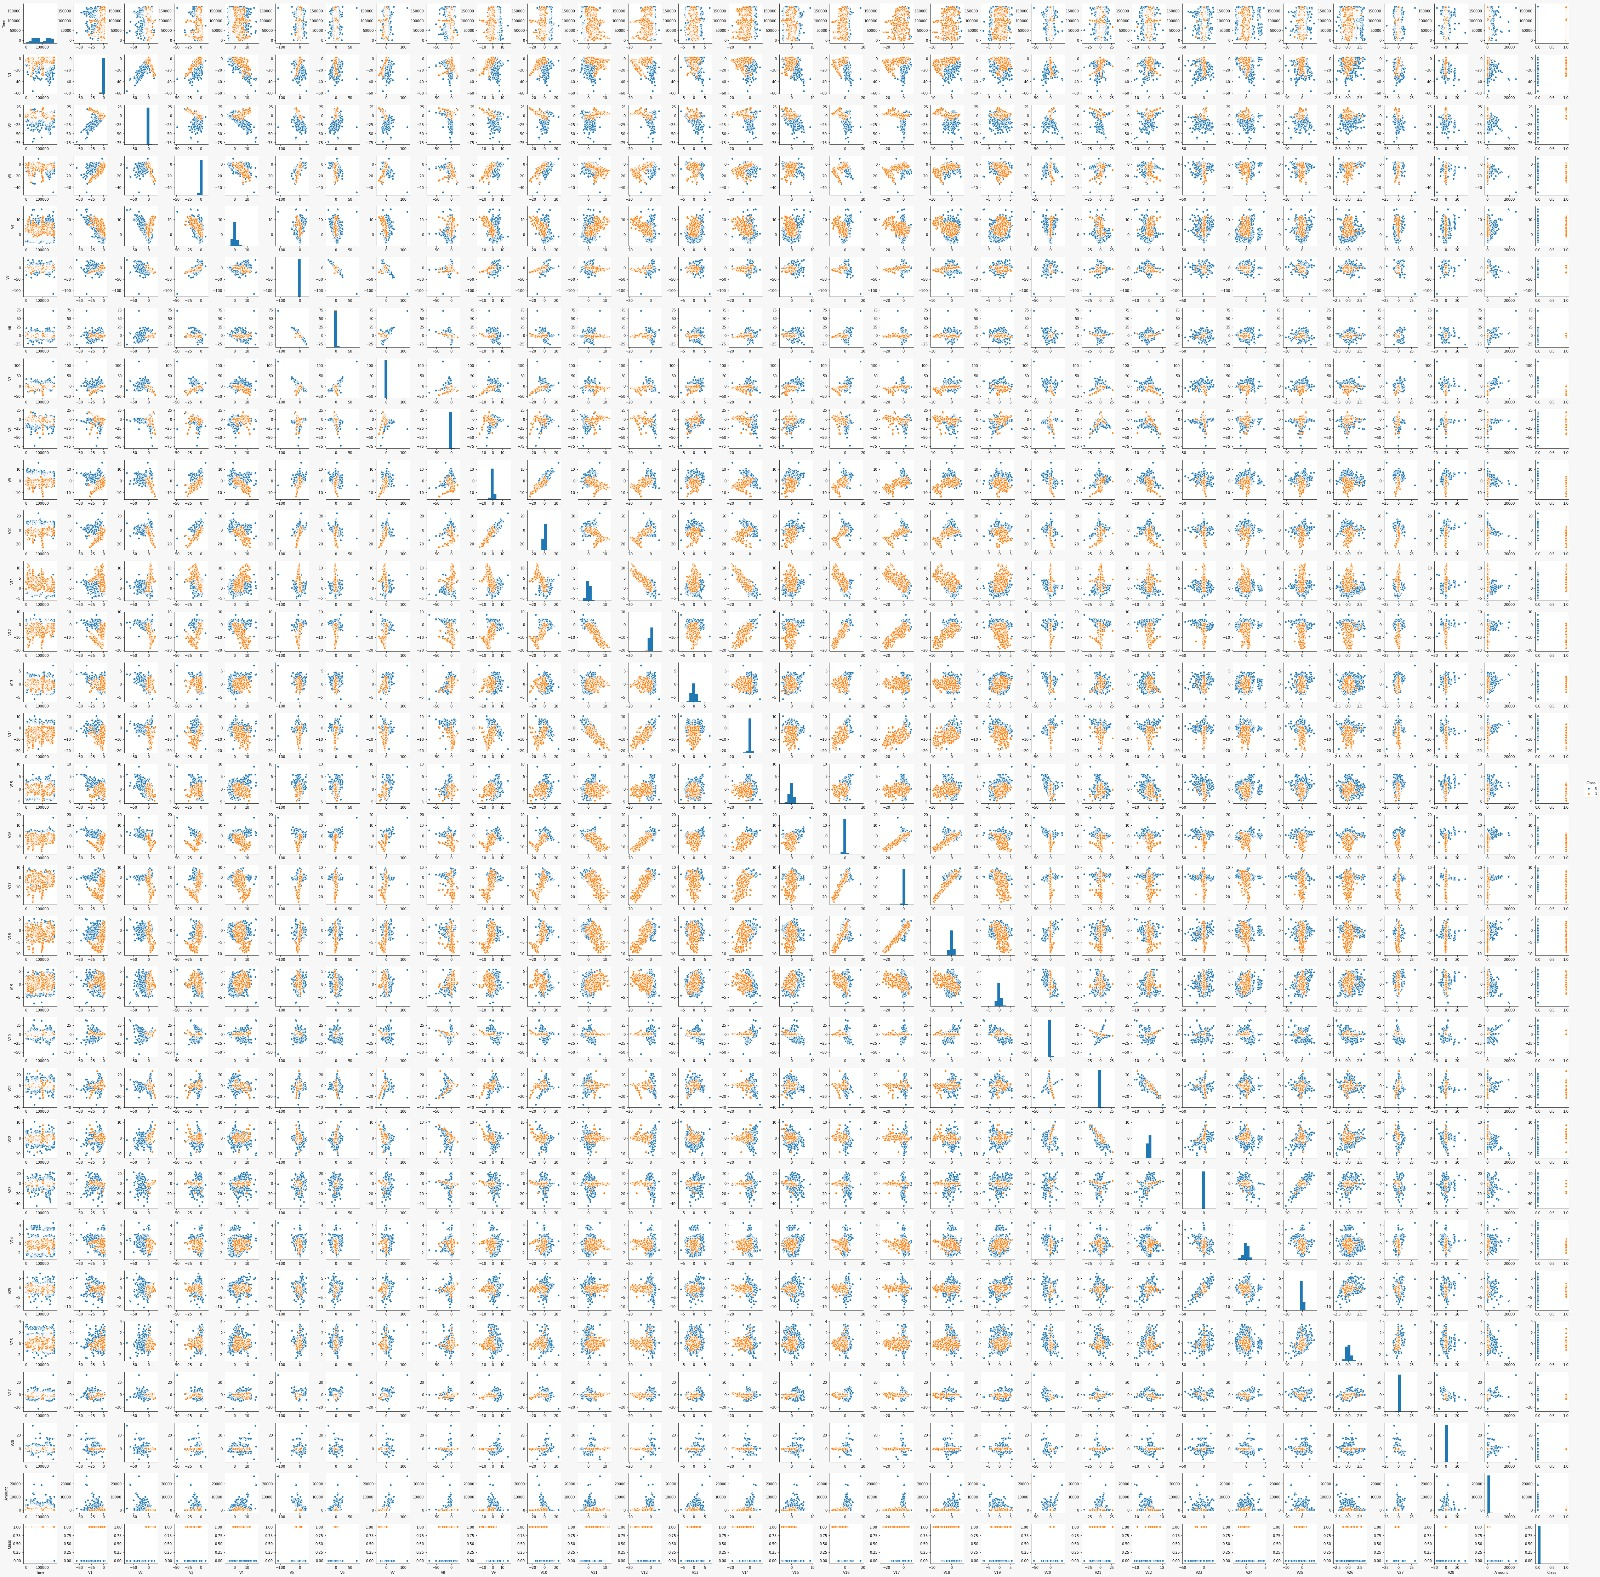

In [582]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
# sns.pairplot(trainFile, hue="Class", size=2);
# Dont Run it Again
# Image(filename='.\pair_plot.jpg', width=500)
# Image(filename='/root/shared/Project/pair_plot.jpg', width=500)

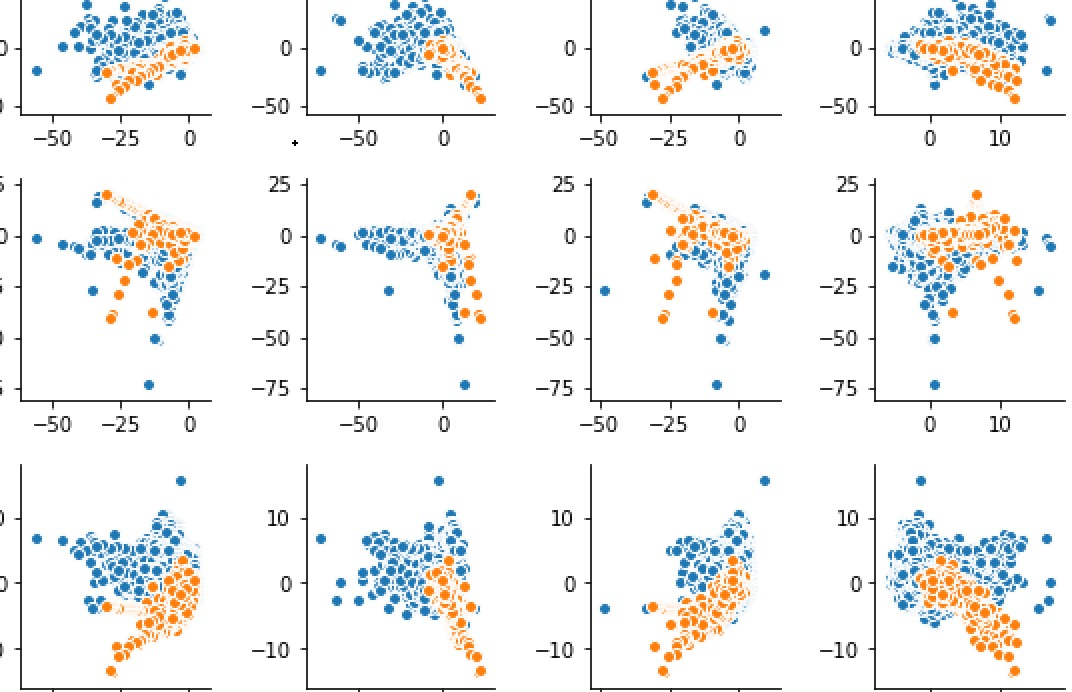

In [583]:
# Image(filename='.\image2.jpeg', width=500)
# Image(filename='/root/shared/Project/image2.jpg', width=500)


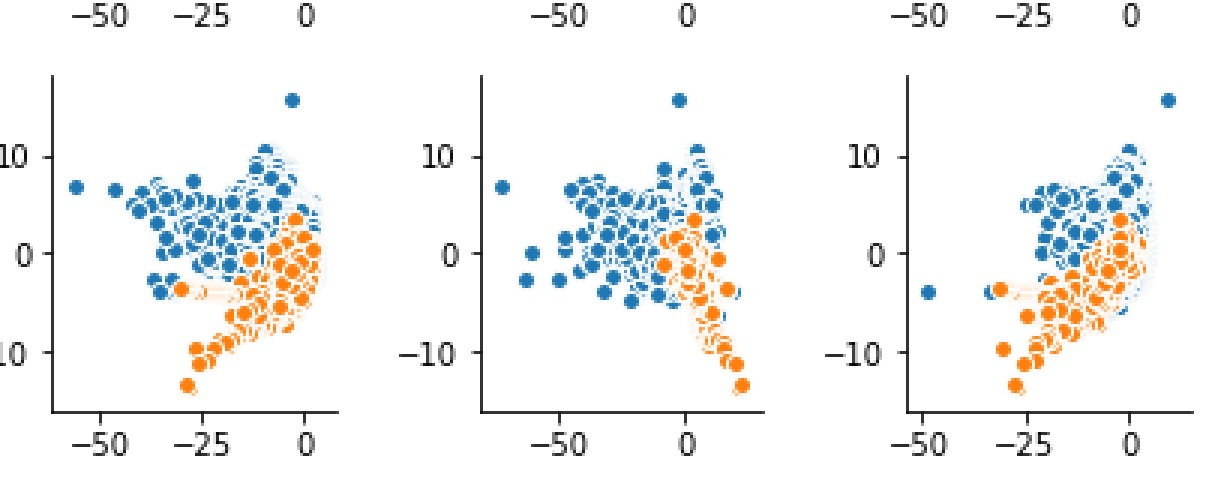

In [584]:
# Image(filename='.\image1.jpeg', width=500)
# Image(filename='/root/shared/Project/image1.jpg', width=500)

In [585]:
non_fraud = trainFile.loc[(trainFile["Class"] ==0)]
non_fraud = non_fraud.drop(["Class","Time"],axis=1)

fraud = trainFile.loc[(trainFile["Class"] ==1)]
fraud = fraud.drop(["Class","Time"],axis=1)

nfrdStd = num_pipeline.fit_transform(non_fraud)
frdStd = num_pipeline.fit_transform(fraud)
#non_fraud

<a id='feature_eng1'></a>
## Feature Extraction

Here we attempt to cluster the Fraud and non-fraud data into diffrent sets of clusters. Then we create features as distance to the centroids of the clusters.

In [586]:
from sklearn.cluster import KMeans
nfrdCentro = KMeans(n_clusters=6, random_state=0).fit(nfrdStd)
frdCentro = KMeans(n_clusters=4, random_state=0).fit(frdStd)


In [587]:
#kmeans = np.concatenate((nfrdCentro, frdCentro), axis=0)
kmeans = np.concatenate((nfrdCentro.cluster_centers_, frdCentro.cluster_centers_), axis=0)


In [588]:
#kmeans.labels_
#kmeans.cluster_centers_
import numpy as np
import scipy
#X=trainFile_0.values
dist_0=[]
dist_1=[]
dist_2=[]
dist_3=[]
dist_4=[]
dist_5=[]
dist_6=[]
dist_7=[]
dist_8=[]
dist_9=[]
isFraud=[]

for x in frdStd:
    dist_0.append(np.sqrt(np.sum((x-kmeans[0])**2,axis=0)))
    dist_1.append(np.sqrt(np.sum((x-kmeans[1])**2,axis=0)))
    dist_2.append(np.sqrt(np.sum((x-kmeans[2])**2,axis=0)))
    dist_3.append(np.sqrt(np.sum((x-kmeans[3])**2,axis=0)))
    dist_4.append(np.sqrt(np.sum((x-kmeans[4])**2,axis=0)))
    dist_5.append(np.sqrt(np.sum((x-kmeans[5])**2,axis=0)))
    dist_6.append(np.sqrt(np.sum((x-kmeans[6])**2,axis=0)))
    dist_7.append(np.sqrt(np.sum((x-kmeans[7])**2,axis=0)))
    dist_8.append(np.sqrt(np.sum((x-kmeans[8])**2,axis=0)))
    dist_9.append(np.sqrt(np.sum((x-kmeans[9])**2,axis=0)))
    isFraud.append(1)

distDf_frd = pd.DataFrame({
        "dist_0": dist_0,
        "dist_1": dist_1,
        "dist_2": dist_2,
        "dist_3": dist_3,
        "dist_4": dist_4,
        "dist_5": dist_5,
        "dist_6": dist_6,
        "dist_7": dist_7,
        "dist_8": dist_9,
        "dist_9": dist_9,
        "Class": isFraud})

ndist_0=[]
ndist_1=[]
ndist_2=[]
ndist_3=[]
ndist_4=[]
ndist_5=[]
ndist_6=[]
ndist_7=[]
ndist_8=[]
ndist_9=[]
nisFraud=[]

for x in nfrdStd:
    ndist_0.append(np.sqrt(np.sum((x-kmeans[0])**2,axis=0)))
    ndist_1.append(np.sqrt(np.sum((x-kmeans[1])**2,axis=0)))
    ndist_2.append(np.sqrt(np.sum((x-kmeans[2])**2,axis=0)))
    ndist_3.append(np.sqrt(np.sum((x-kmeans[3])**2,axis=0)))
    ndist_4.append(np.sqrt(np.sum((x-kmeans[4])**2,axis=0)))
    ndist_5.append(np.sqrt(np.sum((x-kmeans[5])**2,axis=0)))
    ndist_6.append(np.sqrt(np.sum((x-kmeans[6])**2,axis=0)))
    ndist_7.append(np.sqrt(np.sum((x-kmeans[7])**2,axis=0)))
    ndist_8.append(np.sqrt(np.sum((x-kmeans[8])**2,axis=0)))
    ndist_9.append(np.sqrt(np.sum((x-kmeans[9])**2,axis=0)))
    nisFraud.append(0)
    
distDf_nfrd = pd.DataFrame({
        "dist_0": ndist_0,
        "dist_1": ndist_1,
        "dist_2": ndist_2,
        "dist_3": ndist_3,
        "dist_4": ndist_4,
        "dist_5": ndist_5,
        "dist_6": ndist_6,
        "dist_7": ndist_7,
        "dist_8": ndist_8,
        "dist_9": ndist_9,
        "Class": nisFraud})

In [589]:
distDf_nfrd.describe()

,Class,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9
count,284315.0,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,0.0,6.116103,4.851254,6.101647,5.435932,4.867528,9.935402,5.602896,7.217766,4.818166,12.142765
std,0.0,2.389532,2.618596,2.415878,2.490206,2.608444,1.919459,2.440732,2.237662,2.594087,1.817083
min,0.0,2.137619,1.761662,1.885214,2.377188,1.784875,3.743211,3.427381,5.336931,2.157831,7.518243
25%,0.0,5.220271,3.596465,5.173039,4.367626,3.607935,9.421162,4.537709,6.295677,3.593355,11.596186
50%,0.0,5.714453,4.440654,5.702111,4.951786,4.435704,9.724289,5.117832,6.819093,4.354142,11.883663
75%,0.0,6.414597,5.417424,6.465392,5.880240,5.431610,10.197510,5.937535,7.510222,5.308900,12.276915
max,0.0,221.866830,221.828516,221.887297,221.759739,221.820640,216.911018,221.671464,221.620509,221.829508,223.447985


In [590]:
distDf_frd.describe()

,Class,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,1.0,6.261550,5.019525,6.238162,5.577172,5.031574,10.001143,5.321084,7.177455,12.113336,12.113336
std,0.0,1.979271,2.281806,2.039689,2.157561,2.278289,1.542240,3.008995,2.366174,2.005940,2.005940
min,1.0,3.218660,2.040493,3.867172,3.038915,2.092904,5.350681,1.888066,2.417309,2.237313,2.237313
25%,1.0,5.036752,3.487796,4.916588,4.126554,3.470267,9.337248,3.072088,5.424642,11.398199,11.398199
50%,1.0,5.788426,4.531939,5.657515,4.965463,4.448372,9.746829,4.375437,7.192229,12.304848,12.304848
75%,1.0,7.062175,6.112424,7.155588,6.598044,6.261062,10.463416,6.296281,8.991450,13.143005,13.143005
max,1.0,19.396758,18.924097,18.928710,19.239390,18.824359,20.245714,20.010525,18.348237,19.216058,19.216058


In [591]:
#dft_1=dft.loc[(dft["isFraud"] ==1)]
#print(len(dft_1))
#dft_0=dft.loc[(dft["isFraud"] ==0)]
distDf_nfrdSubSet=distDf_nfrd.sample(frac=0.03)
#print(len(dft_0))
trainFile=distDf_nfrdSubSet.append(distDf_frd, ignore_index=True)

#dft_1=dft_1.sample(frac=0.3)
#trainFile=dft_1.append(dft_0, ignore_index=True)
#trainFile=dft
trainFile= shuffle(trainFile)
#trainFile.reset_index(drop=True)
trainFile= shuffle(trainFile)
#trainFile.reset_index(drop=False)
trainFile= shuffle(trainFile)
dataY=trainFile[("Class")]
dataX=trainFile.drop(["Class"],axis=1)
#X,Y

LR: 0.963819 (0.020123)
LR_L1: 0.963667 (0.020689)
LDA: 0.965026 (0.010102)
CART: 0.993426 (0.010048)
NB: 0.904399 (0.047703)
RF_10: 0.985205 (0.017172)
RF_100: 0.994250 (0.008844)


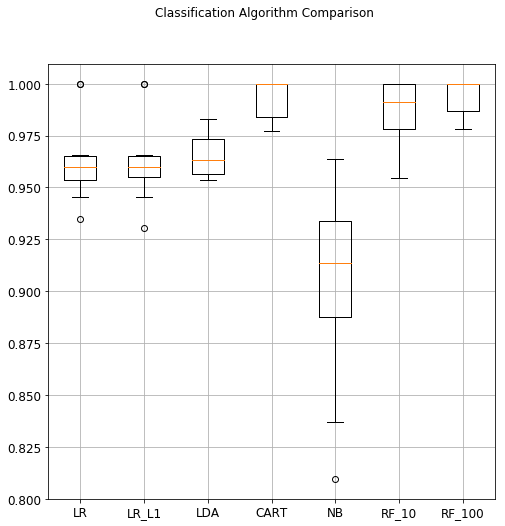

In [592]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from time import time
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

#from sklearn import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Y=dataY.values
X=dataX.values


#X_train=X
#y_train=Y
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LR_L1', LogisticRegression(C=1,penalty='l1',max_iter=1000) ))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RF_10',RandomForestClassifier(n_estimators=10)))
models.append(('RF_100',RandomForestClassifier(n_estimators=100)))
#models.append(('RF_5.21',RandomForestClassifier(max_features=5,n_estimators=21)))

#models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5,n_jobs=-1)))

#models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring ='recall'#'roc_auc' #'recall' #'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(8, 8))
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

In [593]:
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
        'penalty': ('l1','l2'),
        'C': (0.001,0.01,1,10,100),
    }

# scoring ='roc_auc' #'recall'
scoring ='recall'
log_reg = LogisticRegression(max_iter=10000)
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring=scoring, random_state=42) #'neg_mean_squared_error'

In [594]:
X_train, X_test, y_train, y_test = train_test_split(dataX.values,dataY.values,test_size = 0.3, random_state = 42)


In [595]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3,10,30,100], 'max_features': [3,4,5,6,7,8,9]},
    # then try 8 (2×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators':  [3,10,30,100], 'max_features': [3,4,5,6,7,8,9]},
  ]

# train across 5 folds, that's a total of (12+8)*5=100 rounds of training 
grid_search = GridSearchCV(rf_clf, param_grid, cv=5,
                           scoring='recall')
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
grid_search.fit(X_train, y_train)

print("BEST PARAMS")
print(grid_search.best_params_)
grid_search.best_estimator_

BEST PARAMS
{'max_features': 3, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [596]:
cvres = grid_search.cv_results_
print("mean_score  params")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)


mean_score  params
0.991431738993 {'max_features': 3, 'n_estimators': 3}
0.994284809267 {'max_features': 3, 'n_estimators': 10}
0.991429476447 {'max_features': 3, 'n_estimators': 30}
0.991429476447 {'max_features': 3, 'n_estimators': 100}
0.982896970037 {'max_features': 4, 'n_estimators': 3}
0.988571881081 {'max_features': 4, 'n_estimators': 10}
0.991429476447 {'max_features': 4, 'n_estimators': 30}
0.991429476447 {'max_features': 4, 'n_estimators': 100}
0.974326446484 {'max_features': 5, 'n_estimators': 3}
0.988571881081 {'max_features': 5, 'n_estimators': 10}
0.991429476447 {'max_features': 5, 'n_estimators': 30}
0.991429476447 {'max_features': 5, 'n_estimators': 100}
0.99146749359 {'max_features': 6, 'n_estimators': 3}
0.988571881081 {'max_features': 6, 'n_estimators': 10}
0.988571881081 {'max_features': 6, 'n_estimators': 30}
0.991429476447 {'max_features': 6, 'n_estimators': 100}
0.988571881081 {'max_features': 7, 'n_estimators': 3}
0.985752302857 {'max_features': 7, 'n_estimators

In [597]:

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.022338,0.001626,0.991432,0.998577,NaN,3,3,"{'max_features': 3, 'n_estimators': 3}",6,1.000000,...,0.985714,1.000000,0.985714,0.996441,0.985714,0.996441,0.004158,0.000085,0.006999,0.001743
1,0.067500,0.002684,0.994285,0.997862,NaN,3,10,"{'max_features': 3, 'n_estimators': 10}",1,1.000000,...,0.985714,1.000000,1.000000,0.992883,1.000000,1.000000,0.004148,0.000061,0.006999,0.002848
2,0.191061,0.006021,0.991429,1.000000,NaN,3,30,"{'max_features': 3, 'n_estimators': 30}",7,1.000000,...,0.985714,1.000000,0.985714,1.000000,1.000000,1.000000,0.010893,0.000283,0.006999,0.000000
3,0.651052,0.017021,0.991429,1.000000,NaN,3,100,"{'max_features': 3, 'n_estimators': 100}",7,1.000000,...,0.985714,1.000000,0.985714,1.000000,1.000000,1.000000,0.022529,0.000271,0.006999,0.000000
4,0.024174,0.001560,0.982897,0.999288,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",37,0.985915,...,0.985714,1.000000,0.985714,1.000000,0.985714,0.996441,0.005822,0.000064,0.005735,0.001423
5,0.074041,0.002634,0.988572,0.997150,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",20,1.000000,...,0.985714,0.992883,0.985714,0.996441,1.000000,1.000000,0.003706,0.000029,0.010691,0.002664
6,0.225920,0.005748,0.991429,1.000000,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",7,1.000000,...,0.985714,1.000000,0.985714,1.000000,1.000000,1.000000,0.009271,0.000084,0.006999,0.000000
7,0.743828,0.016625,0.991429,1.000000,NaN,4,100,"{'max_features': 4, 'n_estimators': 100}",7,1.000000,...,0.985714,1.000000,0.985714,1.000000,1.000000,1.000000,0.029527,0.000229,0.006999,0.000000
8,0.024604,0.001499,0.974326,0.997150,NaN,5,3,"{'max_features': 5, 'n_estimators': 3}",54,0.985915,...,0.985714,1.000000,0.971429,0.996441,0.985714,0.996441,0.001655,0.000025,0.016689,0.001425
9,0.082989,0.002609,0.988572,0.998574,NaN,5,10,"{'max_features': 5, 'n_estimators': 10}",20,1.000000,...,0.985714,0.996441,0.985714,1.000000,1.000000,1.000000,0.005172,0.000046,0.010691,0.001747


## Input features and their importance for best model

 We developed 10 new features after feature transformation. Their importance is shown in the plot below.

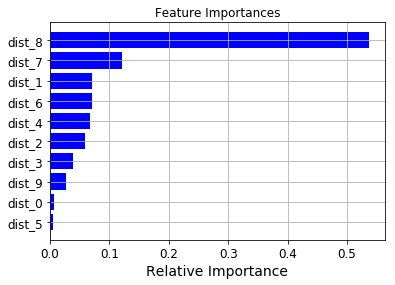

In [598]:

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

attributes = list(dataX.columns.values)
attributes

sortedFeatures = sorted(zip(feature_importances,attributes), reverse=False)
sortedFeatures

# Plot the feature importances of the forest
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.figure() 
plt.title("Feature importances")
sortedNames = np.array(sortedFeatures)[:, 1]
sortedImportances = np.array(sortedFeatures)[:, 0]

plt.title('Feature Importances')
plt.barh(range(len(sortedNames)), sortedImportances, color='b', align='center')
plt.yticks(range(len(sortedNames)), sortedNames)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

## Evaluation of the best model

In [599]:

grid_search.best_estimator_.fit(X_train, y_train)


samples = [(X_test, y_test)]
models_names = ["RandomForest, Feature Transform"]
models = [grid_search.best_estimator_]
res_ft = evaluate(models, metrics, samples, metrics_names, models_names)
res = res.append(res_ft)
res

,Precision,Recall,False Negative,F1,F0.5,AUC
"Logistic, Ratio(1F:1NF)",0.937500,0.895522,0.104478,0.916031,0.928793,0.923070
"Logistic, Ratio(1F:10NF)",0.968992,0.833333,0.166667,0.896057,0.938438,0.915310
"Logistic, Ratio(1F:20NF)",0.956522,0.857143,0.142857,0.904110,0.934844,0.927553
"RandomForest, Ratio(1F:1NF)",0.977941,0.863636,0.136364,0.917241,0.952722,0.931309
"RandomForest, Feautres=5, Ratio(1F:1NF)",0.849673,0.844156,0.155844,0.846906,0.848564,0.918174
"RandomForest, Feautres=10, Ratio(1F:1NF)",0.848101,0.870130,0.129870,0.858974,0.852417,0.930992
"RandomForest, Feautres=20, Ratio(1F:1NF)",0.829268,0.883117,0.116883,0.855346,0.839506,0.936806
"Voting(LR,RF,SVC,DT,LDA), Feautres=20(1F:1NF)",0.992424,0.850649,0.149351,0.916084,0.960411,0.925155
"Voting(LR,RF,SVC,LDA), Feautres=20(1F:1NF)",0.992308,0.837662,0.162338,0.908451,0.956973,0.918661
"Voting(LR,RF,DT), Feautres=20(1F:1NF)",0.877419,0.883117,0.116883,0.880259,0.878553,0.938334


In [600]:
from sklearn.metrics import roc_curve

y_pred = grid_search.best_estimator_.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

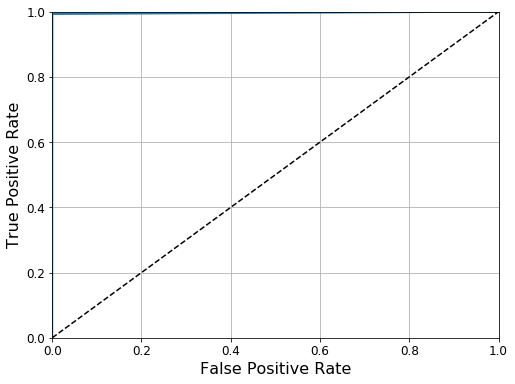

In [601]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.grid()
plt.show()

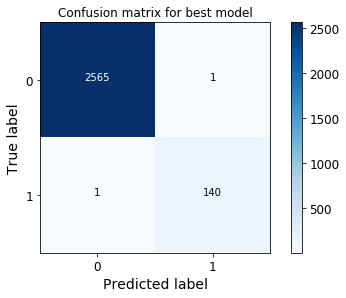

In [602]:

# Plot confusion matrix
best_cm = confusion_matrix(y_test, y_pred)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(best_cm
                      , classes=class_names
                      , title='Confusion matrix for best model')
plt.show()

<a id='stats1'></a>
## Statistical Significance of the best model 

In [603]:
from sklearn.model_selection import cross_val_score
from scipy import stats
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# A sampling based bakeoff using *K-fold cross-validation*: 
# it randomly splits the training set into K distinct subsets (k=30)
# this bakeoff framework can be used for regression or classification
#Control system is a linear regression based pipeline

kFolds=10
# Logistic Regression as base
control = cross_val_score(log_reg, test_prepared, y_test_ctrl['Class'],
                             scoring='recall', cv=kFolds)

# control_acc = control.mean()
# control = control.mean()
# display_scores(lin_rmse_scores)
# display_scores(control)


#Treatment system is a random forest based pipeline

treatment = cross_val_score(grid_search.best_estimator_, X_test, y_test,
                         scoring='recall', cv=kFolds)

# treatment_acc = treatment.mean()
# treatment = treatment.mean()
# display_scores(treatment)
# treatment = tree_rmse_scores = np.sqrt(-scores)
# display_scores(tree_rmse_scores)


pval = stat_test(control, treatment)

pval
    

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-8.73, 0.00001)
Machine learning pipeline B is better than A


1.0967186411636563e-05

## Discussion on best model

The results from base model(Logistic Regression) is below. 

Precision: 0.937500	
Recall: 0.895522 	
False Negative Rate: 0.104478	
F1 Score: 0.916031  	
F0.5 Score: 0.928793	
AUC: 0.923070

The results from best model(Random Forest) after feature transformation is below.

Precision: 1.000000	
Recall: 0.979866	
False Negative Rate: 0.020134 	
F1 Score: 0.989831  	
F0.5 Score: 0.995907	
AUC: 0.989933

To detect maximum number of fraud transacations, we need to have model that maximizes the recall and minimizes the false negative rate. As you can see from the results, the best model reduced the false negative rate from 10% to 2%, while improving the recall from 0.89 to 0.97. The feature transformation is key factor in this achievement. The best model's performance is much better than the base model as indicated by the statistical significance test. 	 	